In [1]:
import cv2                                      # type: ignore
import numpy as np                              # type: ignore
import matplotlib.pyplot as plt                 # type: ignore
from skimage.measure import shannon_entropy     # type: ignore

## Arithmetic Operations

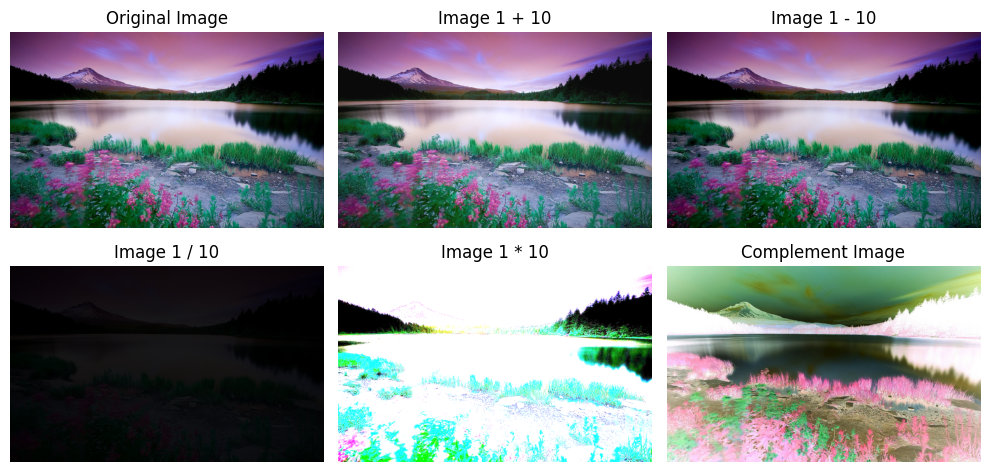

In [2]:
img1 = cv2.imread(r"./photo1.jpg")

# Add 
add = cv2.add(img1, 10)
# Subtract
sub = cv2.subtract(img1, 10)
# Divide
div = cv2.divide(img1, 10)
# Multiplication
mul = cv2.multiply(img1, 10)
# complement 
comp = 255 - img1

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1); plt.imshow(img1); plt.title("Original Image"); plt.axis('off')
plt.subplot(2, 3, 2); plt.imshow(add); plt.title('Image 1 + 10'); plt.axis('off')
plt.subplot(2, 3, 3); plt.imshow(sub); plt.title('Image 1 - 10'); plt.axis('off')
plt.subplot(2, 3, 4); plt.imshow(div); plt.title('Image 1 / 10'); plt.axis('off')
plt.subplot(2, 3, 5); plt.imshow(mul); plt.title('Image 1 * 10'); plt.axis('off')
plt.subplot(2, 3, 6); plt.imshow(comp); plt.title('Complement Image'); plt.axis('off')

plt.tight_layout()
plt.show()

## Change Lighting

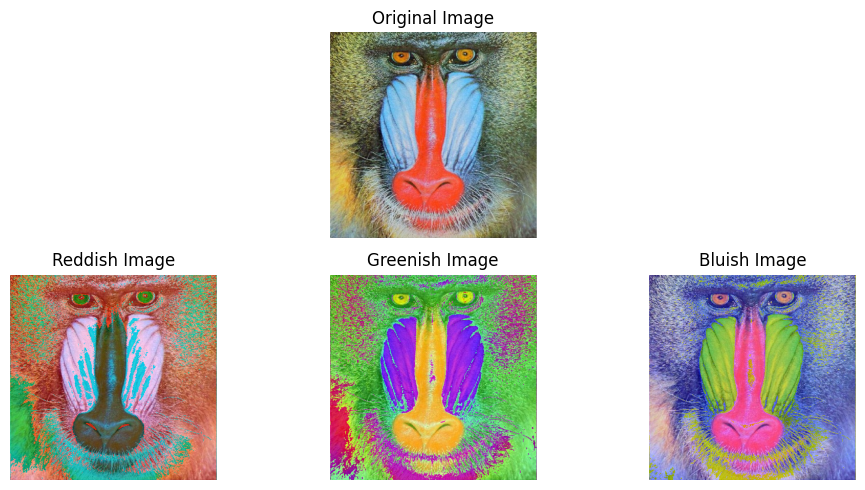

In [ ]:
image = cv2.imread(r"./photo2.jpg")

R = image[:, :, 2]  # Red channel
G = image[:, :, 1]  # Green channel
B = image[:, :, 0]  # Blue channel

new_R = np.clip(R + 100, 0, 255)
new_G = np.clip(G + 100, 0, 255)
new_B = np.clip(B + 100, 0, 255)

reddish_image = cv2.merge([B, G, new_R])
greenish_image = cv2.merge([B, new_G, R])
bluish_image = cv2.merge([new_B, G, R])

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reddish_image_rgb = cv2.cvtColor(reddish_image, cv2.COLOR_BGR2RGB)
greenish_image_rgb = cv2.cvtColor(greenish_image, cv2.COLOR_BGR2RGB)
bluish_image_rgb = cv2.cvtColor(bluish_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 2); plt.imshow(image_rgb); plt.title('Original Image'); plt.axis('off')
plt.subplot(2, 3, 4); plt.imshow(reddish_image_rgb); plt.title('Reddish Image'); plt.axis('off')
plt.subplot(2, 3, 5); plt.imshow(greenish_image_rgb); plt.title('Greenish Image'); plt.axis('off')
plt.subplot(2, 3, 6); plt.imshow(bluish_image_rgb); plt.title('Bluish Image'); plt.axis('off')

plt.tight_layout()
plt.show()

## Eliminating Color Channels

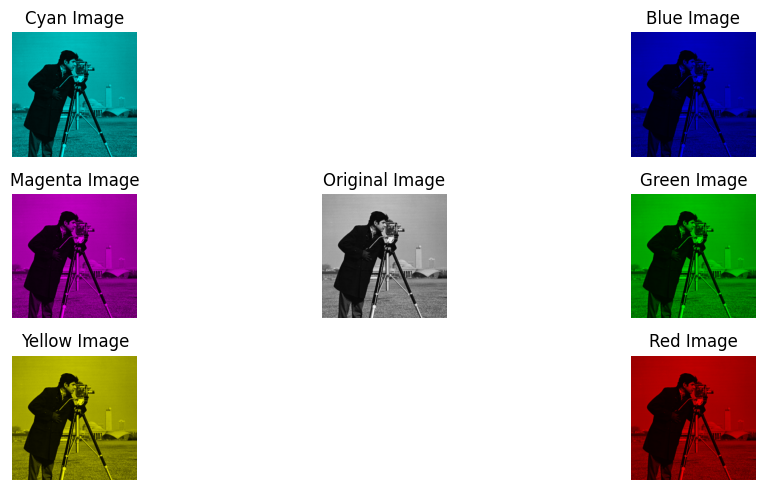

In [ ]:
image = cv2.imread(r"./photo3.jpg")

BG = image.copy()
BR = image.copy()
GR = image.copy()
B = image.copy()
G = image.copy()
R = image.copy()

BG[:, :, 2]     = 0          # Set Red to be Zero (Cyan)
BR[:, :, 1]     = 0          # Set Green to be Zero (Magenta)
GR[:, :, 0]     = 0          # Set Blue to be Zero (Yellow)
B[:, :, [1, 2]] = 0          # Set Image to be Zero (Blue)
G[:, :, [0, 2]] = 0          # Set Image to be Zero (Red)
R[:, :, [0, 1]] = 0          # Set Image to be Zero (Green) 

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
BG_rgb = cv2.cvtColor(BG, cv2.COLOR_BGR2RGB)
BR_rgb = cv2.cvtColor(BR, cv2.COLOR_BGR2RGB)
GR_rgb = cv2.cvtColor(GR, cv2.COLOR_BGR2RGB)
B_rgb = cv2.cvtColor(B, cv2.COLOR_BGR2RGB)
G_rgb = cv2.cvtColor(G, cv2.COLOR_BGR2RGB)
R_rgb = cv2.cvtColor(R, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(3, 3, 5); plt.imshow(image_rgb); plt.title('Original Image'); plt.axis('off')
plt.subplot(3, 3, 1); plt.imshow(BG_rgb); plt.title('Cyan Image'); plt.axis('off')
plt.subplot(3, 3, 4); plt.imshow(BR_rgb); plt.title('Magenta Image'); plt.axis('off')
plt.subplot(3, 3, 7); plt.imshow(GR_rgb); plt.title('Yellow Image'); plt.axis('off')
plt.subplot(3, 3, 3); plt.imshow(B_rgb); plt.title('Blue Image'); plt.axis('off')
plt.subplot(3, 3, 6); plt.imshow(G_rgb); plt.title('Green Image'); plt.axis('off')
plt.subplot(3, 3, 9); plt.imshow(R_rgb); plt.title('Red Image'); plt.axis('off')

plt.tight_layout()
plt.show()

## Automatic Threshold

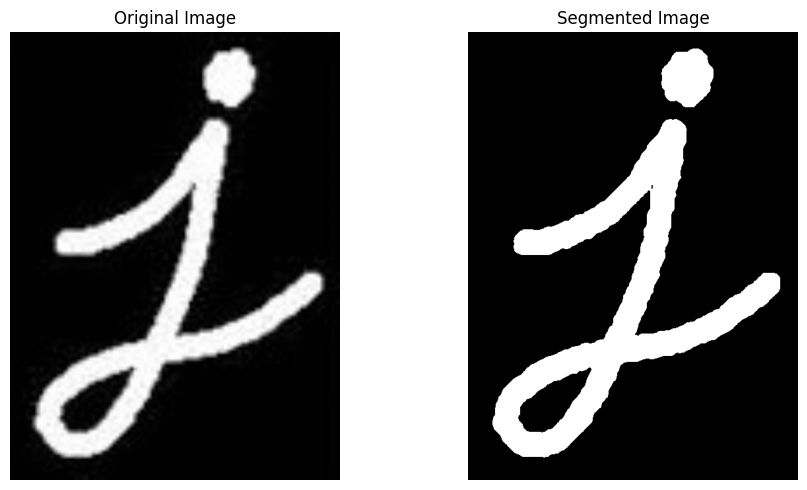

In [ ]:
image = cv2.imread(r"./photo4.jpg")

threshold = np.mean(image)
new_threshold = 0

done = False
while not done:

    img1 = image >= threshold
    img2 = image < threshold
    
    m1 = np.mean(image[img1])
    m2 = np.mean(image[img2])
    
    new_threshold = 0.5 * (m1 + m2)
    
    done = (abs(new_threshold - threshold) == 0)
    
    threshold = new_threshold

# Binary Image By Threshold
ret, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.title("Original Image"); plt.imshow(image); plt.axis('off')
plt.subplot(1, 2, 2); plt.title("Segmented Image"); plt.imshow(thresh); plt.axis('off')
plt.tight_layout()
plt.show()

## Erosion

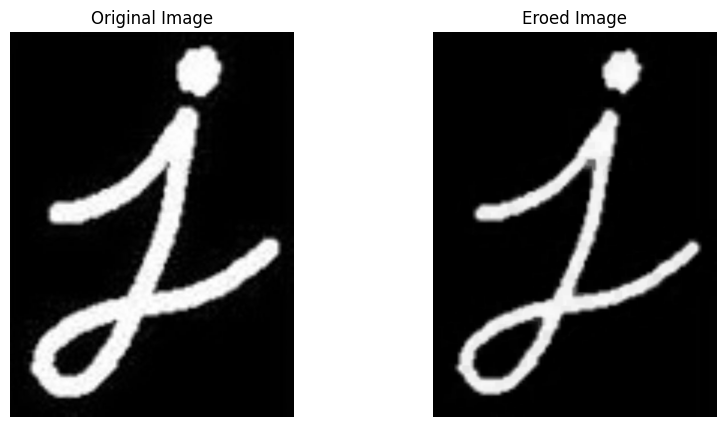

In [9]:
image = cv2.imread(r"./photo4.jpg")
eroded_image = cv2.erode(image, kernel=np.ones((3, 3), np.uint8), iterations=5)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(image); plt.title("Original Image"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(eroded_image); plt.title("Eroed Image"); plt.axis("off")
plt.show()

## Dilation

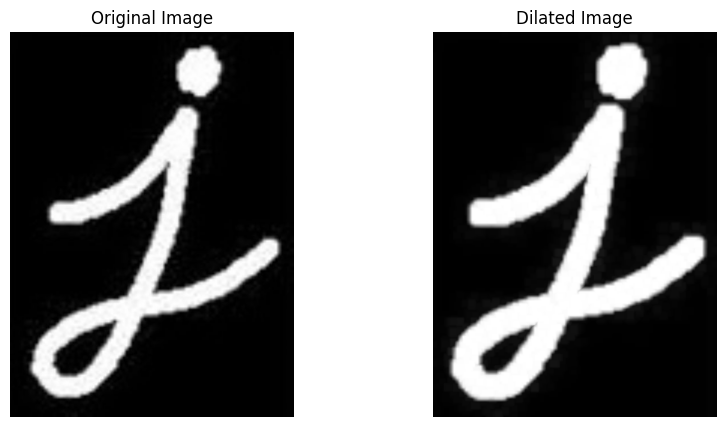

In [11]:
image = cv2.imread(r"./photo4.jpg")
Dilated_image = cv2.dilate(image, kernel=np.ones((3, 3), np.uint8), iterations=5)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(image); plt.title("Original Image"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(Dilated_image); plt.title("Dilated Image"); plt.axis("off")
plt.show()

## Openning

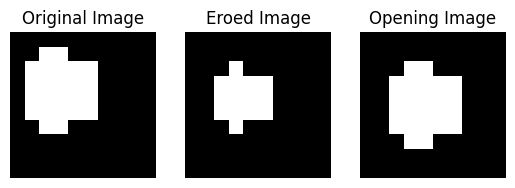

In [21]:
image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 0, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), dtype='uint8')
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

eroded_image = cv2.erode(binary_image, kernel=np.ones((2, 2), np.uint8), iterations=1)
opening_image = cv2.dilate(eroded_image, kernel=np.ones((2, 2), np.uint8), iterations=1)

plt.subplot(1,3,1); plt.imshow(binary_image, cmap='gray'); plt.title("Original Image"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(eroded_image, cmap='gray'); plt.title("Eroed Image"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(opening_image, cmap='gray'); plt.title("Opening Image"); plt.axis("off")
plt.show()

## Closing

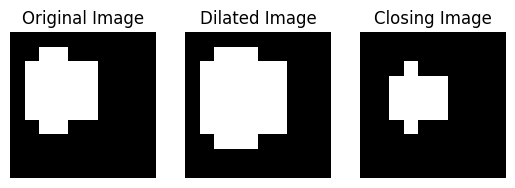

In [20]:
image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 0, 0, 0, 0],
    [0, 0, 255, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), dtype='uint8')
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

dilated_image = cv2.dilate(binary_image, kernel=np.ones((2, 2), np.uint8), iterations=1)
closing_image = cv2.erode(dilated_image, kernel=np.ones((3, 3), np.uint8), iterations=1)

plt.subplot(1,3,1); plt.imshow(binary_image, cmap= 'gray'); plt.title("Original Image"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(dilated_image, cmap= 'gray'); plt.title("Dilated Image"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(closing_image, cmap= 'gray'); plt.title("Closing Image"); plt.axis("off")
plt.show()

## Hit or Miss

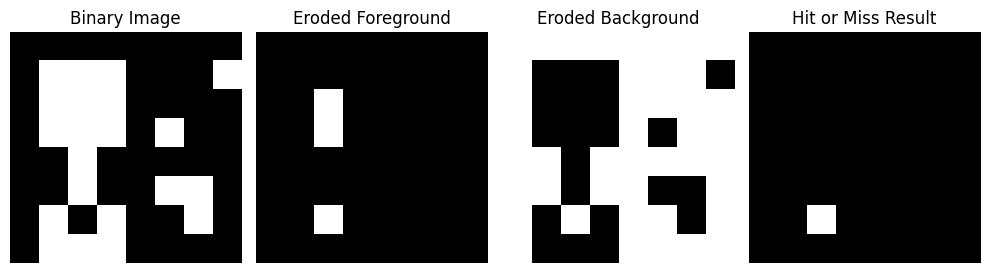

In [ ]:
image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]),dtype="uint8")

_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

B1 = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
], dtype=np.uint8)

B2 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], dtype=np.uint8)

# Step 3: Erode the foreground with the foreground SE
eroded_foreground = cv2.erode(binary_image, B1)

# Step 4: Erode the complement of the binary image with the background SE
inverted_image = cv2.bitwise_not(binary_image)  # Invert the binary image
eroded_background = cv2.erode(inverted_image, B2)

# Step 5: Combine the results using a logical AND operation
hit_or_miss_result = cv2.bitwise_and(eroded_foreground, eroded_background)

plt.figure(figsize=(10, 6))
plt.subplot(1, 4, 1)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Eroded Foreground')
plt.imshow(eroded_foreground, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Eroded Background')
plt.imshow(eroded_background, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Hit or Miss Result')
plt.imshow(hit_or_miss_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Convex Hull

The color is a tuple (Blue, Green, Red):

Red: (0, 0, 255)
Green: (0, 255, 0)
Blue: (255, 0, 0)
Yellow: (255, 255, 0)
Magenta: (255, 0, 255)
Cyan: (0, 255, 255)
White: (255, 255, 255)

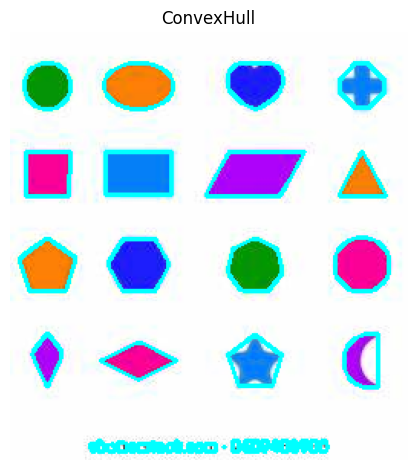

In [ ]:
img = cv2.imread(r"./photo5.jpg")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(imgray, 100, 255, cv2.THRESH_OTSU)
inverted_binary = ~binary

contours, hierarchy = cv2.findContours(inverted_binary,cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    convexHull = cv2.convexHull(contour)
    cv2.drawContours(img, [convexHull], -1, (0, 255, 255), 2)

plt.subplot(1,1,1); plt.imshow(img, cmap='gray'); plt.title('ConvexHull'); plt.axis('off')
plt.tight_layout()
plt.show()

## Edge Detection

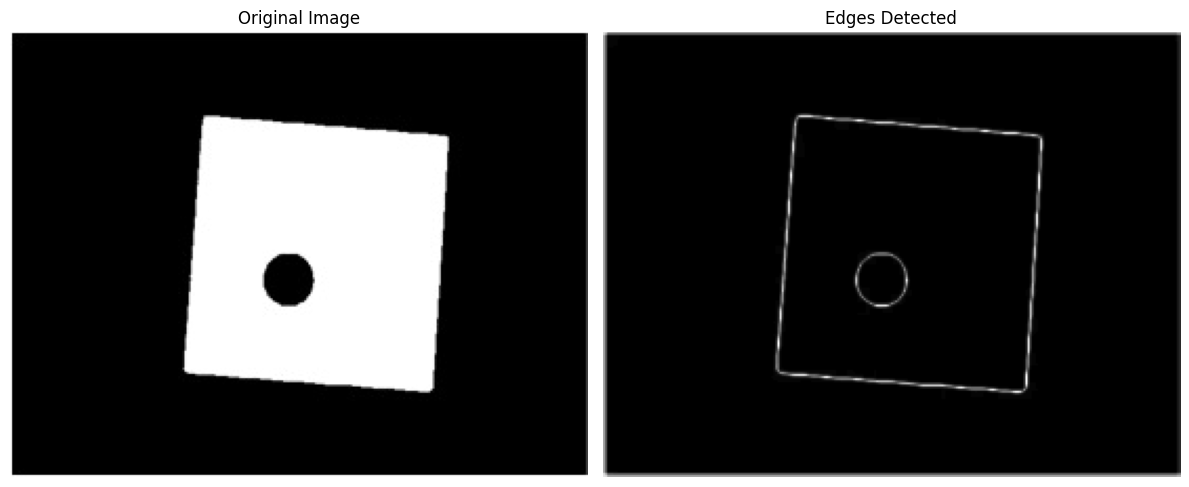

In [ ]:
img = cv2.imread(r"./photo6.jpg", cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(img, (5, 5), 0)
kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(blurred, kernel, iterations=1)
dilated = cv2.dilate(blurred, kernel, iterations=1)
edges = cv2.erode(cv2.subtract(dilated, eroded), kernel, iterations=2)

plt.figure(figsize=(12, 6))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title("Original Image"); plt.axis('off')
plt.subplot(122); plt.imshow(edges, cmap='gray'); plt.title("Edges Detected"); plt.axis('off')
plt.tight_layout()
plt.show()

## Chain Code

Contour 1:
4-Direction Chain Code: [0, 1, 1, -1]
--------------------------------------------------
Contour 2:
4-Direction Chain Code: [1]
--------------------------------------------------
Contour 3:
Invalid contour or insufficient points for chain code generation.
--------------------------------------------------
Contour 4:
Invalid contour or insufficient points for chain code generation.
--------------------------------------------------
Contour 5:
4-Direction Chain Code: [0]
--------------------------------------------------
Contour 6:
4-Direction Chain Code: [0]
--------------------------------------------------
Contour 7:
4-Direction Chain Code: [0]
--------------------------------------------------
Contour 8:
4-Direction Chain Code: [1]
--------------------------------------------------
Contour 9:
4-Direction Chain Code: [-1, -1, 3, 1, -1]
--------------------------------------------------
Contour 10:
Invalid contour or insufficient points for chain code generation.
-----------

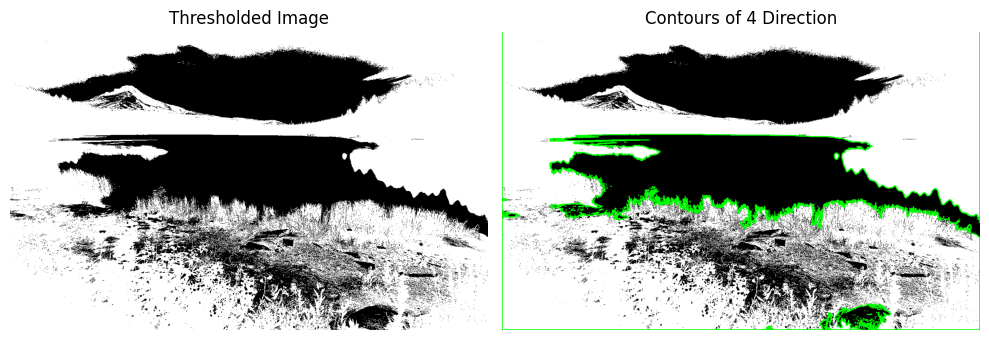

In [38]:
num = int(input("Enter num of direction (4 or 8): "))

def chain_code(contour, directions=8):
    """Generate chain code for a given contour using 4 or 8 directions."""
    direction_maps = {
        4: {(0, 1): 0, (1, 0): 1, (0, -1): 2, (-1, 0): 3},
        8: {(0, 1): 0, (1, 1): 1, (1, 0): 2, (1, -1): 3, 
            (0, -1): 4, (-1, -1): 5, (-1, 0): 6, (-1, 1): 7}
    }
    direction_map = direction_maps[directions]
    points = contour.squeeze()
    if len(points.shape) != 2 or points.shape[1] != 2 or len(points) < 2:
        return []  # Return empty chain code if contour is invalid
    chain = []
    for i in range(len(points) - 1):
        dx = np.sign(points[i + 1][0] - points[i][0])  # Normalize difference
        dy = np.sign(points[i + 1][1] - points[i][1])
        if (dx, dy) in direction_map:  # Check if valid direction exists
            chain.append(direction_map[(dx, dy)])
        else:
            chain.append(-1)  # Append -1 for invalid moves (fallback)
    return chain

# Load and preprocess the image
image_path = r"./photo1.jpg"  # Change to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Thresholding
_, binary_image = cv2.threshold(cv2.bitwise_not(image), 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Generate and display chain codes
if num in [4, 8]:
    for idx, contour in enumerate(contours):
        print(f"Contour {idx + 1}:")
        chain = chain_code(contour, directions=num)
        if chain:
            print(f"{num}-Direction Chain Code: {chain}")
        else:
            print("Invalid contour or insufficient points for chain code generation.")
        print("-" * 50)
    # Visualization
    contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1); plt.imshow(binary_image, cmap='gray'); plt.title("Thresholded Image"); plt.axis('off')
    plt.subplot(1, 2, 2); plt.imshow(contour_image); plt.title(f"Contours of {num} Direction"); plt.axis('off')
    plt.tight_layout()
    plt.show()

else:
    print("You should enter num 4 or 8.")

## GLCM

In [39]:
image = cv2.imread(r"./photo6.jpg")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Unique values and statistics
unique_values = np.unique(gray_image)
num_unique_values = len(unique_values)
min_value = np.min(gray_image)
max_value = np.max(gray_image)
n = max_value - min_value + 1

# Print grayscale statistics
print(f"Unique values count: {num_unique_values}")
print(f"Min grayscale value: {min_value}")
print(f"Max grayscale value: {max_value}")
print(f"Number of grayscale levels: {n}")
print(f"Unique values: {unique_values}")

# Function to compute GLCM
def compute_glcm(gray, angle):
    N_grayLevel = 256
    cm = np.zeros((N_grayLevel, N_grayLevel))
    R, C = gray.shape
    offsets = {0: (0, 1), 45: (-1, 1), 90: (-1, 0), 135: (-1, -1)}
    dx, dy = offsets[angle]
    
    for i in range(R):
        for j in range(C):
            x, y = gray[i, j], None
            if 0 <= i + dx < R and 0 <= j + dy < C:
                y = gray[i + dx, j + dy]
            if y is not None and 0 <= x < N_grayLevel and 0 <= y < N_grayLevel:
                cm[x, y] += 1
    
    cm += np.transpose(cm)  # Make symmetrical
    glcm = cm / np.sum(cm)  # Normalize
    return glcm

# Function to calculate contrast, homogeneity, and entropy
def calculate_features(glcm):
    contrast, homogeneity = 0, 0
    entropy = shannon_entropy(glcm)
    
    for i in range(glcm.shape[0]):
        for j in range(glcm.shape[1]):
            contrast += ((i - j) ** 2) * glcm[i, j]
            homogeneity += glcm[i, j] / (1 + abs(i - j))
    
    return contrast, homogeneity, entropy

# Process angles and compute features
angles = [0, 45, 90, 135]
results = {}

for angle in angles:
    glcm = compute_glcm(gray_image, angle)
    contrast, homogeneity, entropy = calculate_features(glcm)
    results[f"Angle {angle}"] = {'Contrast': contrast, 'Homogeneity': homogeneity, 'Entropy': entropy}

# Print results
for angle, metrics in results.items():
    print(f"Results for {angle}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Unique values count: 223
Min grayscale value: 0
Max grayscale value: 255
Number of grayscale levels: 256
Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  51  53  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  73  75  76  77  78
  80  81  82  83  84  85  86  87  88  90  91  92  93  94  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 118 119
 120 121 122 125 126 127 128 129 130 131 133 134 135 136 137 138 139 140
 141 144 145 148 149 150 151 152 153 154 155 156 158 159 160 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 177 179 180 181 182 183 184
 185 186 188 192 196 197 198 199 200 201 202 203 204 206 207 208 210 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249

## LBP

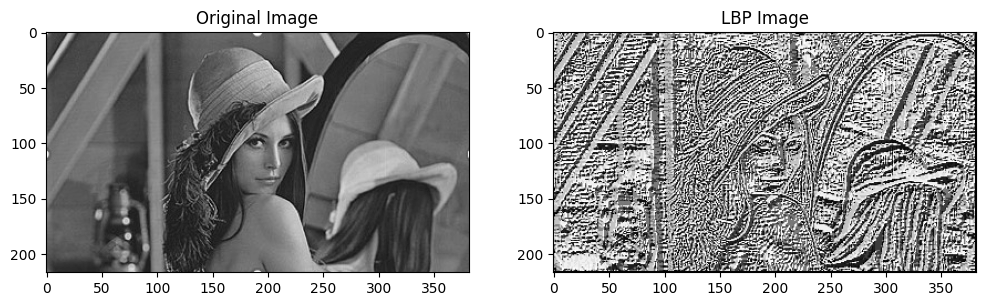

In [ ]:
image = cv2.imread(r"./photo7.jpg", cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape
lbp_image = np.zeros((rows, cols), dtype=np.uint8)

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        center_pixel = image[i, j]
        binary_string = ''
        
        # Compare neighbors to the center pixel
        binary_string += '1' if image[i - 1, j - 1] >= center_pixel else '0'    # index 0
        binary_string += '1' if image[i - 1, j] >= center_pixel else '0'        # index 1
        binary_string += '1' if image[i - 1, j + 1] >= center_pixel else '0'    # index 2
        binary_string += '1' if image[i, j + 1] >= center_pixel else '0'        # index 3
        binary_string += '1' if image[i + 1, j + 1] >= center_pixel else '0'    # index 4
        binary_string += '1' if image[i + 1, j] >= center_pixel else '0'        # index 5
        binary_string += '1' if image[i + 1, j - 1] >= center_pixel else '0'    # index 6
        binary_string += '1' if image[i, j - 1] >= center_pixel else '0'        # index 7
        
        # Convert binary string to decimal
        lbp_image[i, j] = int(binary_string, 2) 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("LBP Image")
plt.imshow(lbp_image, cmap='gray')
plt.show()